# 1. Importing Data from the CSV files

#### Description of the parameters used in read_csv command
1. encoding = 'ansi'     *<font color=blue>//since the companies, and rounds2 data contains some special characters, 'ansi' encoding type is used to read them properly.</font>*
2. sep = '\t'     *<font color=blue>//While importing Companies data an error is thrown stating that more than 1 field was found. Hence need to explicitly using the sep='\t' parameter so that compiler uses it as a separator.</font>*

In [2]:
import numpy as np
import pandas as pd

companies_df = pd.read_csv("companies.txt", encoding='ansi', sep='\t')
rounds2_df = pd.read_csv("rounds2.csv", encoding='ansi')
mapping_df = pd.read_csv("mapping.csv", encoding='ansi')

companies_df.head()

permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

In [18]:
rounds2_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [17]:
mapping_df.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

# -----------------------------------------------------------------------------------------------------------
# 2. Finding answers to the questions given in the Excel sheet
# -----------------------------------------------------------------------------------------------------------

## Table - 1.1
# -----------------------------------------------------------------------------------------------------------

### Question 1 and 2

<font color="red">**Assumption:**</font>
I am assuming that we don't need to clean the data for this question based on below understanding.
- If we remove the records for blank **country_code** from companies_df dataframe, then we may left with records of those companies in the rounds2_df dataframe.

***Therefore as per my understanding we should merge both the dataframes first and then clean-up the data.***

In [6]:
#list of unique companies in round2 and companies file
print("list of unique companies in round2: ")
print(len(rounds2_df['company_permalink'].unique().tolist()))


print("\nlist of unique companies: ")
print(len(companies_df['permalink'].unique().tolist()))

list of unique companies in round2: 
90247

list of unique companies: 
66368


### Question 3

Since **permalink** field containts unique values and can also uniquely identify each record, it can used as the **unique key for each company**.

### Question 4

<Font color="blue" size="2">To answer question 4 we'll have to merge the companies_df and rounds2_df dataframes. Merging will be done on **companies_df.permalink** and **rounds2_df.company_permalink** columns.</font>

<Font color="red" size="2">Since the values in **companies_df.permalink** and **rounds2_company_permalink** columns are in different case (i.e. uppercase and lowercase), it does not merge properly. To avoid this I am lowering the case of all the values in **companies_df.permalink** and **rounds2_df.company_permalink** columns.</font>

In [6]:
companies_df['permalink'] = companies_df['permalink'].str.lower()
rounds2_df['company_permalink'] = rounds2_df['company_permalink'].str.lower()

#Adding additional keys to find records that do not match in each dataframe
rounds2_df['key1'] = 1
companies_df['key2'] = 1

# merging the dataframes
master_frame = rounds2_df.merge(companies_df, how='outer', left_on='company_permalink', right_on='permalink')

In [8]:
#Checking if there are records in rounds2 dataframe which are not present in companies dataframe.
master_frame[~(master_frame.key2 == master_frame.key1)]

Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd, key1, permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at, key2]
Index: []

Since no records are present, the answer is **No**.

In [9]:
# dropping the additional columns, added to find the records that do not match in each dataframe.
master_frame = master_frame.drop(['key1', 'key2'], axis=1)

### Question 5

<font color="red">**Assumption:**</font> Since the data is merged, I feel we should clean-up the data before answering this question. 

#### 5.1 Identifying the percentage of values that are blank in each column.

In [10]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

Am going to remove the below mentioned **columns** (marked in <font color="red">**red**</font>) from master_frame. Below is the snap-shot of master_frame before data clean-up showing the percentage of records that are blank. <br>
<table border="1" align="left">
    <tr>
        <td>company_permalink</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>funding_round_permalink</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>funding_round_type</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td><font color="red">funding_round_code</font></td>
        <td><font color="red">72.91</font></td>
        <td>too many rows are blank and<br> it is not used in any analysis.</td>
    </tr>
    <tr>
        <td><font color="red">funded_at</font></td>
        <td><font color="red">0.00</font></td>
        <td>not used for any analysis.</td>
    </tr>
    <tr>
        <td>raised_amount_usd</td>
        <td>17.39</td>
        <td></td>
    </tr>
    <tr>
        <td>permalink</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>name</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td><font color="red">homepage_url</font></font></td>
        <td><font color="red">5.34</font></td>
        <td>not used for any analysis.</td>
    </tr>
    <tr>
        <td>category_list</td>
        <td>2.97</td>
        <td></td>
    </tr>
    <tr>
        <td><font color="red">status</font></td>
        <td><font color="red">0.00</font></td>
        <td>not used for any analysis.</td>
    </tr>
    <tr>
        <td>country_code</td>
        <td>7.55</td>
        <td></td>
    </tr>
    <tr>
        <td><font color="red">state_code</font></td>
        <td><font color="red">9.52</font></td>
        <td>not used for any analysis.</td>
    </tr>
    <tr>
        <td><font color="red">region</font></td>
        <td><font color="red">8.84</font></td>
        <td>not used for any analysis.</td>
    </tr>
    <tr>
        <td><font color="red">city</font></td>
        <td><font color="red">8.84</font></td>
        <td>not used for any analysis.</td>
    </tr>
    <tr>
        <td><font color="red">founded_at</font></td>
        <td><font color="red">17.85</font></td>
        <td>not used for any analysis.</td>
    </tr>
</table>

#### 5.2 Dropping unused columns from the master_frame dataframe

In [11]:
# removing above mentioned columns
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('funded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('status', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

And the below mentioned **rows**.

1. records were <font color="magenta">country_code = blank</font>. ***Because such records will impact the values of average investment done in various funding types (e.g. venture, seed etc.)***
2. records were <font color="magenta">funding_amount_usd = blank</font>. ***Because such records will impact the values of count of investment done in different sectors (e.g. Manufacturing, Health etc.)***

<font color="red">**Please note:**</font> *Am not removing the blank records for category list, because the mappings data have a record to map blank category_list.*

#### 5.3 Dropping records where country_code, and raised_amount_usd are null in the master_frame dataframe

In [12]:
# removing blank country_code rows
master_frame = master_frame.dropna(subset=['country_code', 'raised_amount_usd'])

In [13]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.65
country_code               0.00
dtype: float64

snap-shot of master_frame after data clean-up showing the percentage of records that are blank. <br>
<table border="1" align="left">
    <tr>
        <td>company_permalink</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>funding_round_permalink</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>funding_round_type</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>raised_amount_usd</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>permalink</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>name</td>
        <td>0.00</td>
        <td></td>
    </tr>
    <tr>
        <td>category_list</td>
        <td>0.65</td>
        <td></td>
    </tr>
    <tr>
        <td>country_code</td>
        <td>0.00</td>
        <td></td>
    </tr>
</table>

#### 5.4 Finding the answer

In [24]:
# checking the number of records after data clean-up
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 0 to 114947
Data columns (total 8 columns):
company_permalink          89108 non-null object
funding_round_permalink    89108 non-null object
funding_round_type         89108 non-null object
raised_amount_usd          89108 non-null float64
permalink                  89108 non-null object
name                       89107 non-null object
category_list              88529 non-null object
country_code               89108 non-null object
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


Answer is the total number of entries found (**i.e. 89108**) in master_frame dataframe.

# -----------------------------------------------------------------------------------------------------------

## Table 2.1
# -----------------------------------------------------------------------------------------------------------


### Question 1 to 4

In [14]:
# to find the value of various funding types, applying group by to the 'funding_round_type' field.

funding_type_df = master_frame.groupby('funding_round_type')

#----------------------------------------------------------------------------------------------------------------------

# getting the mean value for different types of funding. The apply() function is for showing the values in float format
# because the default view is in exponential format and hence unreadable.

funding_type_df['raised_amount_usd'].mean().apply(lambda x: format(x, 'f'))

funding_round_type
angel                       968559.909645
convertible_note           1331937.831071
debt_financing            17186403.497015
equity_crowdfunding         510947.981514
grant                      4508472.529055
non_equity_assistance       471445.857143
post_ipo_debt            169451789.774834
post_ipo_equity           66018794.259567
private_equity            73618563.617439
product_crowdfunding       1489682.000000
secondary_market          81527203.551724
seed                        748104.498187
undisclosed               15851078.776627
venture                   11735779.935192
Name: raised_amount_usd, dtype: object

From the results above, the value of required funding types are taken as mentioned below;
-  venture         : 11735779.935192
-  angel           : 968559.909645
-  seed            : 748104.498187
-  private_equity  : 73618563.617439

### Question 5

To understand which funding type Spark should invest in. We need to check the total amount invested in each Funding Type and the total number of companies that have invested in each Funding Type.

In [15]:
# getting the total of raised amount in different funding types
funding_type_df['raised_amount_usd'].sum().apply(lambda x: format(x, 'f'))

funding_round_type
angel                      4287814720.000000
convertible_note           1766149564.000000
debt_financing           112278774046.000000
equity_crowdfunding         580436907.000000
grant                      8922267135.000000
non_equity_assistance        29701089.000000
post_ipo_debt             25587220256.000000
post_ipo_equity           39677295350.000000
private_equity           135090064238.000000
product_crowdfunding        494574424.000000
secondary_market           2364288903.000000
seed                      15884502810.000000
undisclosed               21430658506.000000
venture                  564620108462.000000
Name: raised_amount_usd, dtype: object

In [16]:
# getting the count of companies that have invested in different types of funding.
funding_type_df['raised_amount_usd'].count()

funding_round_type
angel                     4427
convertible_note          1326
debt_financing            6533
equity_crowdfunding       1136
grant                     1979
non_equity_assistance       63
post_ipo_debt              151
post_ipo_equity            601
private_equity            1835
product_crowdfunding       332
secondary_market            29
seed                     21233
undisclosed               1352
venture                  48111
Name: raised_amount_usd, dtype: int64

#### <font color="blue">Analysis</font>
Since the most number of companies (i.e. 48,111) have invested more than $564 billion in Venture funding type, and also since it is the company's strategy to invest where others are investing, implying that such funding type is the best. 

It is recommended that Spark Funds invest in **Venture** funding type.

# -----------------------------------------------------------------------------------------------------------

## Table 3.1
# -----------------------------------------------------------------------------------------------------------

### Question 1 to 3

In [17]:
# finding the total amount invested in Venture type funding for each country.
venture_type_df = master_frame.loc[master_frame['funding_round_type'].isin(['venture'])]

# grouping the data by country_code (i.e. country wise)
venture_type_df = venture_type_df.groupby(['country_code'])

# As asked fetching the top 9 countries and storing it in a dataframe
top9 = pd.DataFrame(venture_type_df['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: format(x, 'f'))).head(n=9)

top9

raised_amount_usd
country_code                     
USA           422510842796.000000
CHN            39835418773.000000
GBR            20245627416.000000
IND            14391858718.000000
CAN             9583332317.000000
FRA             7259536732.000000
ISR             6907514579.000000
DEU             6346959822.000000
JPN             3363676611.000000

#### <font color="blue">Analysis</font>
The top 3 english speaking countries for Venture type funding are USA, United Kingdom, and India (1st, 3rd and 4th in the list).

**Please note:** *China is not considered cause english is not one of their official language.*

# -----------------------------------------------------------------------------------------------------------

## Table 5.1
# -----------------------------------------------------------------------------------------------------------

<a id="data_cleaning_table_5_1"></a>
## 5.1.1 Data cleaning for Table 5.1

### 5.1.1.1

In the mapping_df data there are values in **category_list** column where the text **na** is replaced by **0**.

Replacing the **0 with na again** for a proper merge with **primary_sector** column

In [18]:
mapping_df['category_list'] = mapping_df['category_list'].str.replace('0', 'na')


### 5.1.1.2

Due to above step, the value of **enterprise 2.0** gets converted to **enterprise 2.na**.

Therefore correcting the value back to **enterprise 2.0**.

In [19]:
mapping_df['category_list'] = mapping_df['category_list'].str.replace('enterprise 2.na', 'enterprise 2.0')

### 5.1.1.3

Extracting the primary sector from the category_list column.

**[0]** towards the end of the command extracts the 1st value that is split from the category_list.

**str.lower()** at the end convertes the string in lower case. This is required for proper merging with **mapping_df** dataframe

In [20]:
master_frame['primary_sector'] = (master_frame['category_list'].str.split("|", n=1, expand=True)[0]).str.lower()

### 5.1.1.4

Converting the **category_list** of mapping_df to lower case for proper merging with master_frame dataframe.

In [21]:
mapping_df['category_list'] = mapping_df['category_list'].str.lower()

### 5.1.1.5

#### Merging master_frame and mapping_df dataframes for sector analysis.

In [29]:
# merging master_frame and mappings_df dataframes.

main_sector = master_frame.merge(mapping_df, left_on='primary_sector', right_on='category_list', how='outer')
main_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89123 entries, 0 to 89122
Data columns (total 19 columns):
company_permalink                          89108 non-null object
funding_round_permalink                    89108 non-null object
funding_round_type                         89108 non-null object
raised_amount_usd                          89108 non-null float64
permalink                                  89108 non-null object
name                                       89107 non-null object
category_list_x                            88529 non-null object
country_code                               89108 non-null object
primary_sector                             88529 non-null object
category_list_y                            88462 non-null object
Automotive & Sports                        89041 non-null float64
Blanks                                     89041 non-null float64
Cleantech / Semiconductors                 89041 non-null float64
Entertainment                             

#### Creating the dataframes for USA, UK, and India (D1, D2, and D3)

In [34]:
# creating data frame for USA (D1)

# Step 1
# creating a dataframe where we filter the records for funding_type = "venture", and country_code = "USA" and 
# raised_amount_usd between $50,00,000.00 and $150,00,000.00
venture_type_usa_df = main_sector.loc[(main_sector['funding_round_type'].isin(['venture']) & main_sector['country_code'].isin(['USA']) & ((main_sector['raised_amount_usd'] >= 5000000.00) & (main_sector['raised_amount_usd'] <= 15000000.00)))]

# Step 2
# Creating a dataframe (temporary), where we take the total number of companies which have invested in different sectors. 
# Using the data from step 1.
temp_count_sector_wise_df = pd.DataFrame(venture_type_usa_df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].sum()).T

# Step 3
# In this step I'm renaiming the column names, and appending the text "_count" against all the column names of the sectors, 
# so that they remain different from the total investment in the sector column name.
temp_count_sector_wise_df.rename(columns=lambda x: x+'_count', inplace=True)

# Step 4
# to calculate the total amount raised, I'm multiplying the sector columns (i.e. 'Automotive & Sports', 'Blanks' 
# and the other 7) with the 'raised_amount_usd' column. Since the sector columns have 0 or 1, we'll get the value of 
# 'raised_amount_usd' field in the sector column and can easily get a sum of it.
df = venture_type_usa_df[['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']].multiply(venture_type_usa_df['raised_amount_usd'], axis='index')
temp_total_investment_sector_wise_df = pd.DataFrame(df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].sum()).T

# Step 5
# Same as step 3, except that I'm appending the column name with "_Total_Investment".
temp_total_investment_sector_wise_df.rename(columns=lambda x: x+'_Total_Investment', inplace=True)

# Step 6
# Finally concatenating all the 3 dataframes (mentioned below) and creating a new dataframe with the name D1
# 1. venture_type_usa_df = created in Step 1
# 2. temp_count_sector_wise_df = created in step 2 and 3
# 3. temp_total_investment_sector_wise_df = created in step 4 and 5
D1 = pd.concat([venture_type_usa_df, temp_count_sector_wise_df, temp_total_investment_sector_wise_df], axis=1)
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 89097
Data columns (total 37 columns):
company_permalink                                           12150 non-null object
funding_round_permalink                                     12150 non-null object
funding_round_type                                          12150 non-null object
raised_amount_usd                                           12150 non-null float64
permalink                                                   12150 non-null object
name                                                        12150 non-null object
category_list_x                                             12064 non-null object
country_code                                                12150 non-null object
primary_sector                                              12064 non-null object
category_list_y                                             12063 non-null object
Automotive & Sports                                         12149 non-

In [47]:
# creating data frame for GBR (United Kingdom) (D2)
# All the steps are similar to the once created for D1. Therefore I'm skipping the same comments here.

# Step 1
venture_type_gbr_df = main_sector.loc[(main_sector['funding_round_type'].isin(['venture']) & main_sector['country_code'].isin(['GBR']) & ((main_sector['raised_amount_usd'] >= 5000000.00) & (main_sector['raised_amount_usd'] <= 15000000.00)))]

# Step 2
temp_count_sector_wise_df = pd.DataFrame(venture_type_gbr_df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].sum()).T

# Step 3
temp_count_sector_wise_df.rename(columns=lambda x: x+'_count', inplace=True)

# Step 4
df = venture_type_gbr_df[['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']].multiply(venture_type_gbr_df['raised_amount_usd'], axis='index')
temp_total_investment_sector_wise_df = pd.DataFrame(df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].sum()).T

# Step 5
temp_total_investment_sector_wise_df.rename(columns=lambda x: x+'_Total_Investment', inplace=True)

# Step 6
D2 = pd.concat([venture_type_gbr_df, temp_count_sector_wise_df, temp_total_investment_sector_wise_df], axis=1)
D2.head()

company_permalink  \
0                                          NaN   
1                          /organization/90min   
2                          /organization/90min   
225  /organization/common-interest-communities   
257                /organization/geospock-ltd-   

                             funding_round_permalink funding_round_type  \
0                                                NaN                NaN   
1    /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
2    /funding-round/bd626ed022f5c66574b1afe234f3c90d            venture   
225  /funding-round/8195587cbd5e51af7514ee92ef4ba6ba            venture   
257  /funding-round/cf3fe3b7c86186b9f478d0ea37613f7a            venture   

     raised_amount_usd                                  permalink  \
0                  NaN                                        NaN   
1           15000000.0                        /organization/90min   
2            5800000.0                        /organization/90min   
225         10000000.0  /organization/common-interest-communities   
257          5460000.0                /organization/geospock-ltd-   

                            name  \
0                            NaN   
1                          90min   
2                          90min   
225  Common Interest Communities   
257                GeoSpock Ltd.   

                                      category_list_x country_code  \
0                                                 NaN          NaN   
1                 Media|News|Publishing|Soccer|Sports          GBR   
2                 Media|News|Publishing|Soccer|Sports          GBR   
225  Application Platforms|Internet|Software|Startups          GBR   
257         Application Platforms|Databases|Real Time          GBR   

            primary_sector        category_list_y  \
0                      NaN                    NaN   
1                    media                  media   
2                    media                  media   
225  application platforms  application platforms   
257  application platforms  application platforms   

                               ...                             \
0                              ...                              
1                              ...                              
2                              ...                              
225                            ...                              
257                            ...                              

     Social, Finance, Analytics, Advertising_count  \
0                                            133.0   
1                                              NaN   
2                                              NaN   
225                                            NaN   
257                                            NaN   

     Automotive & Sports_Total_Investment  Blanks_Total_Investment  \
0                             167051565.0               57764848.0   
1                                     NaN                      NaN   
2                                     NaN                      NaN   
225                                   NaN                      NaN   
257                                   NaN                      NaN   

     Cleantech / Semiconductors_Total_Investment  \
0                                   1.163990e+09   
1                                            NaN   
2                                            NaN   
225                                          NaN   
257                                          NaN   

     Entertainment_Total_Investment  Health_Total_Investment  \
0                       482784687.0              214537510.0   
1                               NaN                      NaN   
2                               NaN                      NaN   
225                             NaN                      NaN   
257                             NaN                      NaN   

     Manufacturing_Total_Investment  \
0                       3619403

In [48]:
# creating data frame for IND (India) (D3)
# All the steps are similar to the once created for D1. Therefore I'm skipping the same comments here.

# Step 1
venture_type_ind_df = main_sector.loc[(main_sector['funding_round_type'].isin(['venture']) & main_sector['country_code'].isin(['IND']) & ((main_sector['raised_amount_usd'] >= 5000000.00) & (main_sector['raised_amount_usd'] <= 15000000.00)))]

# Step 2
temp_count_sector_wise_df = pd.DataFrame(venture_type_ind_df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].sum()).T

# Step 3
temp_count_sector_wise_df.rename(columns=lambda x: x+'_count', inplace=True)

# Step 4
df = venture_type_ind_df[['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']].multiply(venture_type_ind_df['raised_amount_usd'], axis='index')
temp_total_investment_sector_wise_df = pd.DataFrame(df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].sum()).T

# Step 5
temp_total_investment_sector_wise_df.rename(columns=lambda x: x+'_Total_Investment', inplace=True)

# Step 6
D3 = pd.concat([venture_type_ind_df, temp_count_sector_wise_df, temp_total_investment_sector_wise_df], axis=1)
D3.head()

company_permalink  \
0               /organization/-fame   
550           /organization/babajob   
593  /organization/bharat-matrimony   
640     /organization/bluestone-com   
642     /organization/bluestone-com   

                             funding_round_permalink funding_round_type  \
0    /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
550  /funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d            venture   
593  /funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8            venture   
640  /funding-round/452a7fc1f34df2d3dcda4e28234bc671            venture   
642  /funding-round/f5b252d6442ce231bb01586ca1821f63            venture   

     raised_amount_usd                       permalink              name  \
0           10000000.0             /organization/-fame             #fame   
550         10000000.0           /organization/babajob           Babajob   
593         11750000.0  /organization/bharat-matrimony  Bharat Matrimony   
640          5000000.0     /organization/bluestone-com     Bluestone.com   
642         10000000.0     /organization/bluestone-com     Bluestone.com   

                                       category_list_x country_code  \
0                                                Media          IND   
550  Curated Web|Information Technology|Services|St...          IND   
593                           Curated Web|Match-Making          IND   
640                                        Curated Web          IND   
642                                        Curated Web          IND   

    primary_sector category_list_y  \
0            media           media   
550    curated web     curated web   
593    curated web     curated web   
640    curated web     curated web   
642    curated web     curated web   

                               ...                             \
0                              ...                              
550                            ...                              
593                            ...                              
640                            ...                              
642                            ...                              

     Social, Finance, Analytics, Advertising_count  \
0                                             60.0   
550                                            NaN   
593                                            NaN   
640                                            NaN   
642                                            NaN   

     Automotive & Sports_Total_Investment  Blanks_Total_Investment  \
0                             136900000.0               27000000.0   
550                                   NaN                      NaN   
593                                   NaN                      NaN   
640                                   NaN                      NaN   
642                                   NaN                      NaN   

     Cleantech / Semiconductors_Total_Investment  \
0                                    165380000.0   
550                                          NaN   
593                                          NaN   
640                                          NaN   
642                                          NaN   

     Entertainment_Total_Investment  Health_Total_Investment  \
0                       280830000.0              167740000.0   
550                             NaN                      NaN   
593                             NaN                      NaN   
640                             NaN                      NaN   
642                             NaN                      NaN   

     Manufacturing_Total_Investment  \
0                       200900000.0   
550                             NaN   
593                             NaN   
640                             NaN   
642                             NaN   

     News, Search and Messaging_Total_Investment  Others_Total_Investment  \
0                                    433834545.0             1.013410e+0

### Question 1

In [49]:
# Calculating total number of investments (count) country wise

#D1 - USA
print("USA: ")
print((pd.DataFrame(D1.loc[:,'Automotive & Sports_count':'Social, Finance, Analytics, Advertising_count'].sum())).sum())

#D2 - GBR
print("GBR: ")
print((pd.DataFrame(D2.loc[:,'Automotive & Sports_count':'Social, Finance, Analytics, Advertising_count'].sum())).sum())

#D2 - IND
print("IND: ")
print((pd.DataFrame(D3.loc[:,'Automotive & Sports_count':'Social, Finance, Analytics, Advertising_count'].sum())).sum())

USA: 
0    12149.0
dtype: float64
GBR: 
0    628.0
dtype: float64
IND: 
0    330.0
dtype: float64


### Question 2

In [51]:
# Calculating total amount of investments (USD) country wise

#D1 - USA
print("USA: ")
print((pd.DataFrame(D1.loc[:,'Automotive & Sports_Total_Investment':'Social, Finance, Analytics, Advertising_Total_Investment'].sum())).sum().apply(lambda x: format(x, 'f')))

#D2 - GBR
print("GBR: ")
print((pd.DataFrame(D2.loc[:,'Automotive & Sports_Total_Investment':'Social, Finance, Analytics, Advertising_Total_Investment'].sum())).sum().apply(lambda x: format(x, 'f')))

#D2 - IND
print("IND: ")
print((pd.DataFrame(D3.loc[:,'Automotive & Sports_Total_Investment':'Social, Finance, Analytics, Advertising_Total_Investment'].sum())).sum().apply(lambda x: format(x, 'f')))

USA: 
0    108521860586.000000
dtype: object
GBR: 
0    5436843539.000000
dtype: object
IND: 
0    2976543602.000000
dtype: object


### Question 3 to 8

In [87]:
# Finding top 3 sectors numer of investment wise and their number of investments

#D1 - USA
print("USA: ")
print((pd.DataFrame(D1.loc[:,'Automotive & Sports_count':'Social, Finance, Analytics, Advertising_count'].sum().sort_values(ascending=False))).head(n=3))

#D2 - GBR
print("GBR: ")
print((pd.DataFrame(D2.loc[:,'Automotive & Sports_count':'Social, Finance, Analytics, Advertising_count'].sum().sort_values(ascending=False))).head(n=3))

#D2 - IND
print("IND: ")
print((pd.DataFrame(D3.loc[:,'Automotive & Sports_count':'Social, Finance, Analytics, Advertising_count'].sum().sort_values(ascending=False))).head(n=3))

USA: 
                                                    0
Others_count                                   2950.0
Social, Finance, Analytics, Advertising_count  2714.0
Cleantech / Semiconductors_count               2350.0
GBR: 
                                                   0
Others_count                                   147.0
Social, Finance, Analytics, Advertising_count  133.0
Cleantech / Semiconductors_count               130.0
IND: 
                                                   0
Others_count                                   110.0
Social, Finance, Analytics, Advertising_count   60.0
News, Search and Messaging_count                52.0


### Question 9 - C1

In [55]:
# Company that received the highest investment in Others sector - D1 - USA
top_company_usa_others_df = venture_type_usa_df.loc[((venture_type_usa_df['Others']==1) & (venture_type_usa_df['raised_amount_usd'] == venture_type_usa_df['raised_amount_usd'].max())),['name', 'country_code', 'raised_amount_usd', 'Others']]
top_company_usa_others_df = pd.DataFrame(top_company_usa_others_df.groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
top_company_usa_others_df.head()

raised_amount_usd
name                                  
Infineta Systems            30000000.0
Vormetric                   30000000.0
Code Green Networks         30000000.0
CoVi Technologies           30000000.0
Silverback Systems          30000000.0

### Question 9 - C2

In [58]:
# Company that received the highest investment in Others sector - GBR - United Kingdom

top_company_gbr_others_df = venture_type_gbr_df.loc[((venture_type_gbr_df['Others']==1) & (venture_type_gbr_df['raised_amount_usd'] == venture_type_gbr_df['raised_amount_usd'].max())),['name', 'country_code', 'raised_amount_usd', 'Others']]
top_company_gbr_others_df = pd.DataFrame(top_company_gbr_others_df.groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
top_company_gbr_others_df.head()

raised_amount_usd
name                                      
ip.access                       15000000.0
Tribold                         15000000.0
SilverRail Technologies         15000000.0
SenSage                         15000000.0
Notonthehighstreet              15000000.0

### Question 9 - C3

In [61]:
# Company that received the highest investment in Others sector - D3 - IND - India

top_company_ind_others_df = venture_type_ind_df.loc[((venture_type_ind_df['Others']==1) & (venture_type_ind_df['raised_amount_usd'] == venture_type_ind_df['raised_amount_usd'].max())),['name', 'country_code', 'raised_amount_usd', 'Others']]
top_company_ind_others_df = pd.DataFrame(top_company_ind_others_df.groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
top_company_ind_others_df.head()

raised_amount_usd
name                                      
iPolicy Networks                15000000.0
ZO Rooms                        15000000.0
Voylla Retail Pvt. Ltd.         15000000.0
Tejas Networks India            15000000.0
Roposo                          15000000.0

### Question 10 - C1

In [56]:
# Company that received the highest investment in Social, Finance, Analytics, Advertising sector - USA

top_company_usa_social_df = venture_type_usa_df.loc[((venture_type_usa_df['Social, Finance, Analytics, Advertising']==1) & (venture_type_usa_df['raised_amount_usd'] == venture_type_usa_df['raised_amount_usd'].max())),['name', 'country_code', 'raised_amount_usd', 'Social, Finance, Analytics, Advertising']]
top_company_usa_social_df = pd.DataFrame(top_company_usa_social_df.groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
top_company_usa_social_df.head()

raised_amount_usd
name                                 
Demandbase                 45000000.0
StellaService              30000000.0
Greenplum Software         30000000.0
Conviva                    30000000.0
Turn                       30000000.0

### Question 10 - C2

In [59]:
# Company that received the highest investment in Social, Finance, Analytics, Advertising sector - GBR - United Kingdom

top_company_gbr_others_df = venture_type_gbr_df.loc[((venture_type_gbr_df['Social, Finance, Analytics, Advertising']==1) & (venture_type_gbr_df['raised_amount_usd'] == venture_type_gbr_df['raised_amount_usd'].max())),['name', 'country_code', 'raised_amount_usd', 'Social, Finance, Analytics, Advertising']]
top_company_gbr_others_df = pd.DataFrame(top_company_gbr_others_df.groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
top_company_gbr_others_df.head()

raised_amount_usd
name                         
myThings           15000000.0
Zopa               15000000.0
SimilarWeb         15000000.0
OpenGamma          15000000.0

### Question 10 - C3

In [62]:
# Company that received the highest investment in Social, Finance, Analytics, Advertising sector - D3 - IND - India

top_company_ind_others_df = venture_type_ind_df.loc[((venture_type_ind_df['Social, Finance, Analytics, Advertising']==1) & (venture_type_ind_df['raised_amount_usd'] == venture_type_ind_df['raised_amount_usd'].max())),['name', 'country_code', 'raised_amount_usd', 'Social, Finance, Analytics, Advertising']]
top_company_ind_others_df = pd.DataFrame(top_company_ind_others_df.groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
top_company_ind_others_df.head()

raised_amount_usd
name                              
Manthan Systems         45000000.0
TravelGuru              15000000.0
ShopClues.com           15000000.0
Shiram Credit           15000000.0
Komli Media             15000000.0

# -----------------------------------------------------------------------------------------------------------

# 3. Checkpoint 6: Plots

In [2]:
# importing the libraries required for creating plots

import matplotlib.pyplot as plt
import seaborn as sns

### Plot 1 : total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type

In [35]:
box_plot_df = main_sector.loc[(main_sector['funding_round_type']
                               .isin(['venture', 'seed', 'private_equity'])),['funding_round_type','raised_amount_usd']]

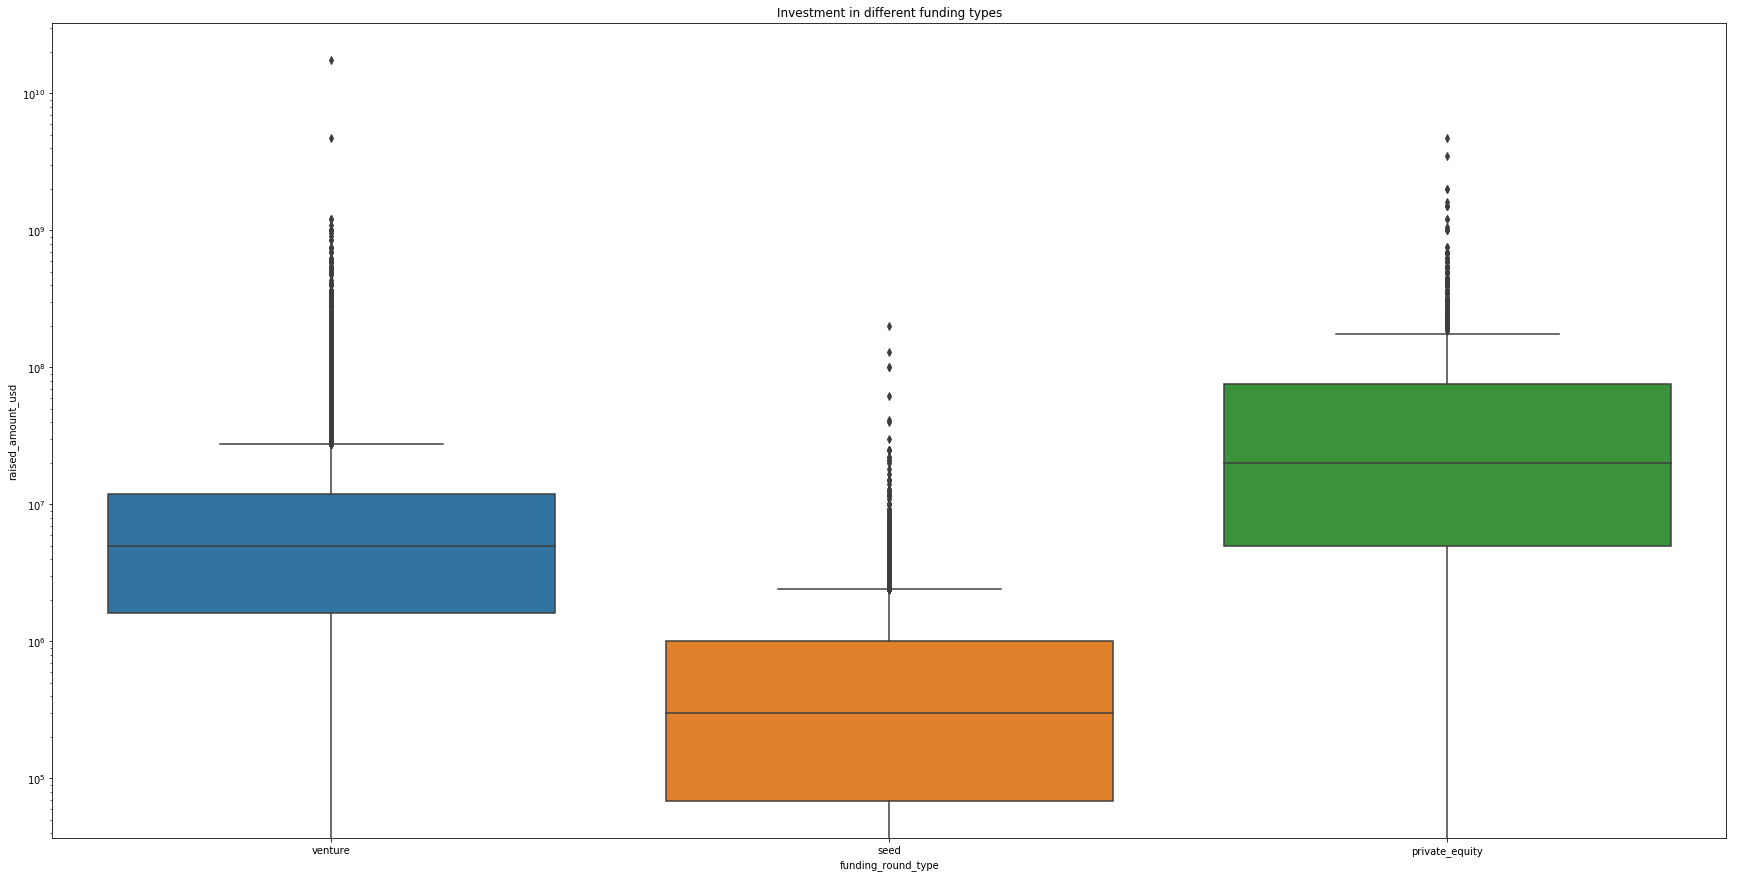

In [36]:
fig = plt.figure(figsize=(30,15))
plt.subplot(111)
plt.title('Investment in different funding types')
sns.boxplot(x="funding_round_type", y="raised_amount_usd", data=box_plot_df)
plt.yscale('log')
plt.rcParams.update({'font.size': 25})
plt.show()

### Plot 2 : top 9 countries against the total amount of investments in venture funding type

In [71]:
bar_plot_type_df = master_frame.loc[((master_frame['funding_round_type'].isin(['venture'])) & (master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']))),['country_code','raised_amount_usd']]
bar_plot_type_df.head()

country_code  raised_amount_usd
0           IND         10000000.0
4           CHN          2000000.0
8           CAN           719491.0
10          USA         20000000.0
11          USA          1700000.0

C:\Users\e050078\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


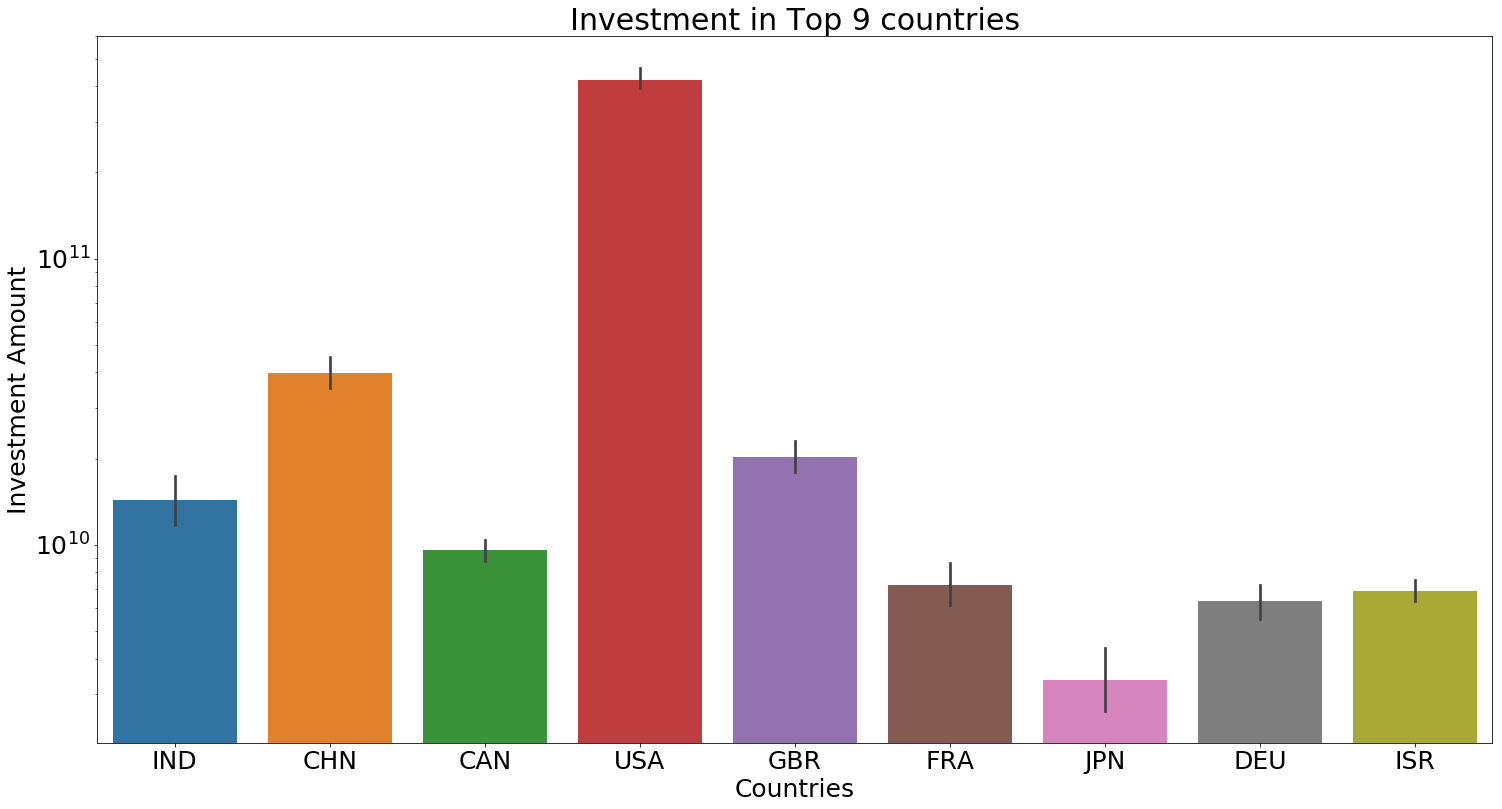

In [207]:
fig = plt.figure(figsize=(25, 13))
plt.subplot(111)
plt.title('Investment in Top 9 countries')
sns.barplot(x='country_code', y='raised_amount_usd', data=bar_plot_type_df, estimator=sum).set(xlabel="Countries", ylabel="Investment Amount")
plt.yscale('log')
plt.rcParams.update({'font.size': 25})
plt.show()
fig.savefig("investment-in-top-9-countries.png")

### Plot 3 : number of investments in the top 3 sectors of the top 3 countries

In [152]:
top_3_sector_usa_plot = D1.loc[0:0,['Others_count', 'Social, Finance, Analytics, Advertising_count', 'Cleantech / Semiconductors_count']]
top_3_sector_gbr_plot = D2.loc[0:0,['Others_count', 'Social, Finance, Analytics, Advertising_count', 'Cleantech / Semiconductors_count']]
top_3_sector_ind_plot = D3.loc[0:0,['Others_count', 'Social, Finance, Analytics, Advertising_count', 'News, Search and Messaging_count']]

top_3_sector_usa_plot.rename(columns=lambda x: x[0:x.find('_')], inplace=True)
top_3_sector_gbr_plot.rename(columns=lambda x: x[0:x.find('_')], inplace=True)
top_3_sector_ind_plot.rename(columns=lambda x: x[0:x.find('_')], inplace=True)

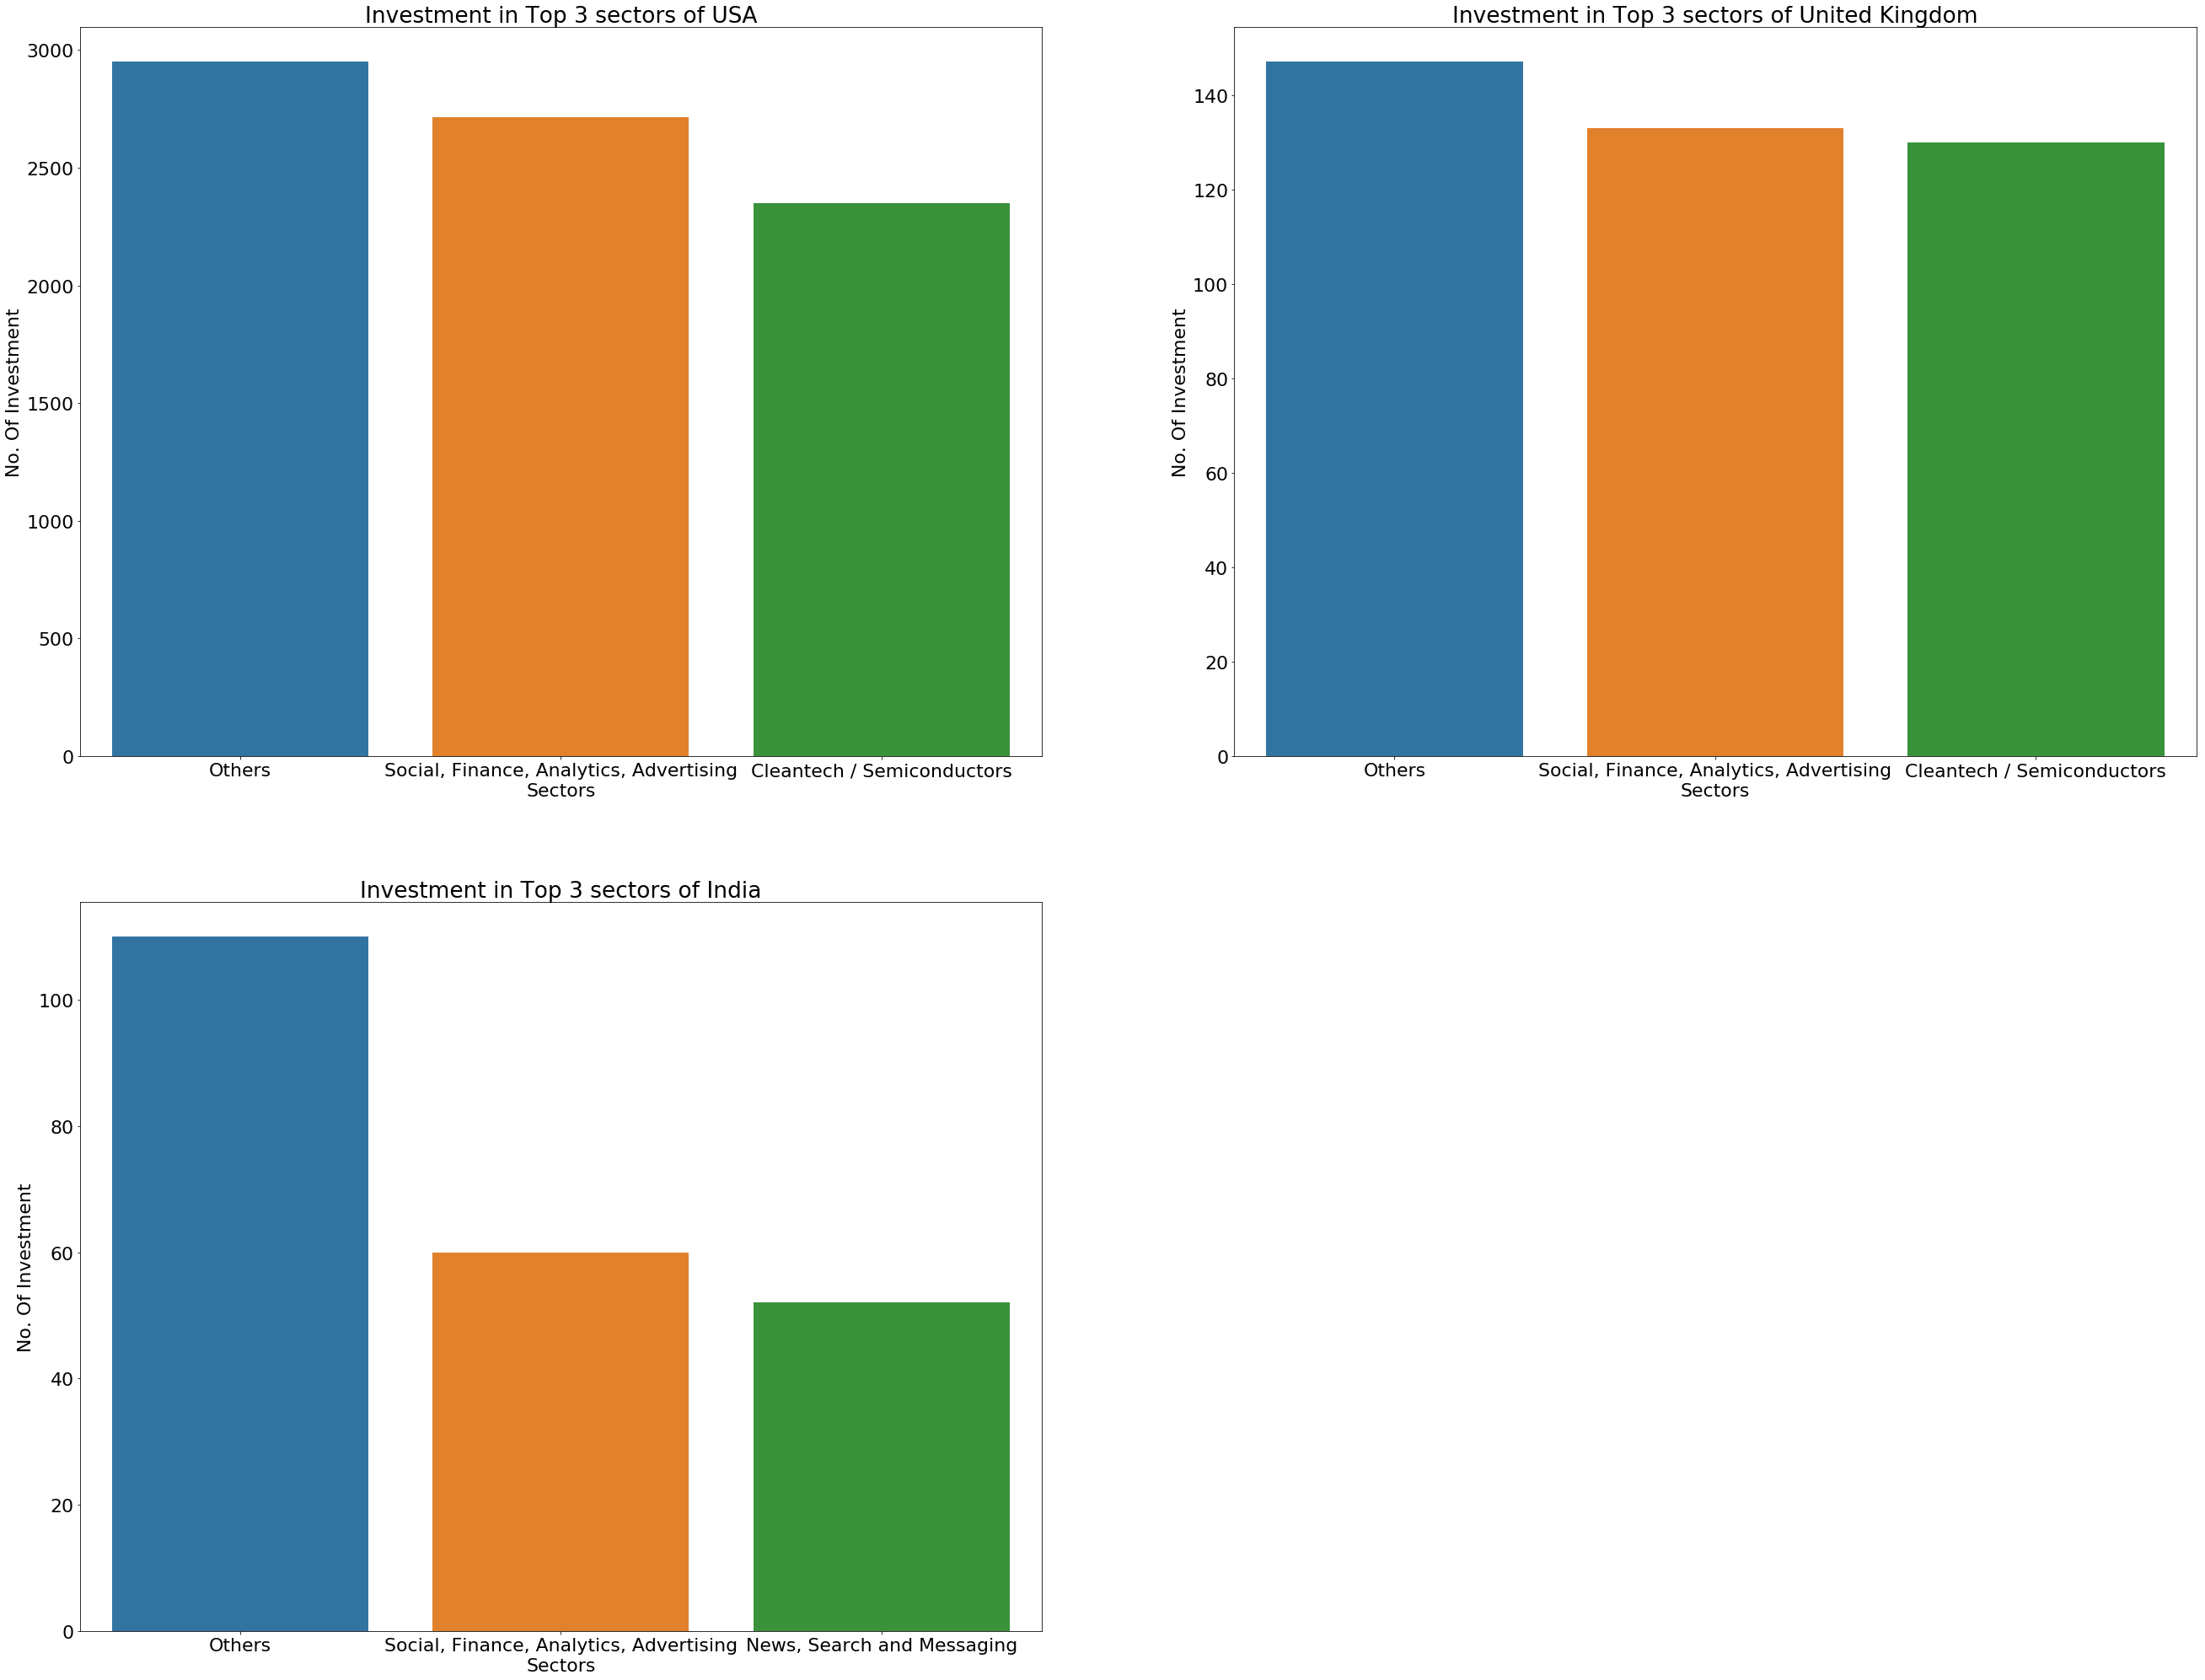

In [219]:
fig = plt.figure(figsize=(45,35))

plt.subplot(221)
plt.title('Investment in Top 3 sectors of USA')
sns.barplot(data=top_3_sector_usa_plot).set(xlabel="Sectors", ylabel="No. Of Investment")

plt.subplot(222)
plt.title('Investment in Top 3 sectors of United Kingdom')
sns.barplot(data=top_3_sector_gbr_plot).set(xlabel="Sectors", ylabel="No. Of Investment")

plt.subplot(223)
plt.title('Investment in Top 3 sectors of India')
sns.barplot(data=top_3_sector_ind_plot).set(xlabel="Sectors", ylabel="No. Of Investment")

plt.rcParams.update({'font.size': 22})
plt.show()

fig.savefig("investment-in-top-3-sectors.png")